<a href="https://colab.research.google.com/github/pachterlab/gget_examples/blob/main/gget_elm_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `gget elm` tutorial
In this tutorial, we will explore different types of inputs to `gget elm` which each traverse a different "path" in the `gget elm` back-end.

The three examples are:
1. The input is a UniProt ID that matches a protein contained in the ELM database -> `gget elm` will return the validated motifs contained in that protein according to the ELM database + `gget elm` will generate regex matches based on its amino acid sequence fetched from UniProt.
2. The input is a UniProt ID that does not match a protein contained in the ELM database -> `gget elm` will return the motif information matching orthologous proteins contained in the ELM database based on DIAMOND alignment of its amino acid sequence fetched from UniProt + `gget elm` will generate regex matches based on its amino acid sequence fetched from UniProt.
3. The input is an amino acid sequence -> `gget elm` will return the information matching orthologous proteins contained in the ELM database based on DIAMOND alignment of the amino acid sequence + `gget elm` will generate regex matches based on the provided sequence.

### Install and import gget:

In [1]:
!pip install -qU gget

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 86.7 MB/s eta 0:00:00


In [2]:
import gget

Show documentation of ELM module:

In [3]:
help(gget.elm)

Help on function elm in module gget.gget_elm:

elm(sequence, uniprot=False, sensitivity='very-sensitive', threads=1, diamond_binary=None, verbose=True, json=False, out=None)
    Locally predicts Eukaryotic Linear Motifs from an amino acid sequence or UniProt ID using
    data from the ELM database (http://elm.eu.org/).
    
    Args:
    - sequence         Amino acid sequence or Uniprot ID (str).
                       If Uniprot ID, set 'uniprot==True'.
    - uniprot          Set to True if the input is a Uniprot ID instead of an amino acid sequence. Default: False.
    - sensitivity      Sensitivity of DIAMOND alignment.
                       One of the following: fast, mid-sensitive, sensitive, more-sensitive, very-sensitive, or ultra-sensitive.
                       Default: "very-sensitive"
    - threads          Number of threads used in DIAMOND alignment. Default: 1.
    - diamond_binary   Path to DIAMOND binary. Default: None -> Uses DIAMOND binary installed with gget.
    - 

In [4]:
# To display all columns of the resulting data frames
import pandas as pd
pd.set_option('display.max_columns', None)


### Download ELM database files:
These files will be saved in the gget installation folder.

In [5]:
gget.setup("elm")

# Command line alternative:
# !gget setup elm

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 87336  100 87336    0     0   106k      0 --:--:-- --:--:-- --:--:--  106k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  914k  100  914k    0     0   384k      0  0:00:02  0:00:02 --:--:--  384k
100 2123k  100 2123k    0     0   621k      0  0:00:03  0:00:03 --:--:--  620k


# Path 1: The input is a UniProt ID that matches a protein contained in the ELM database
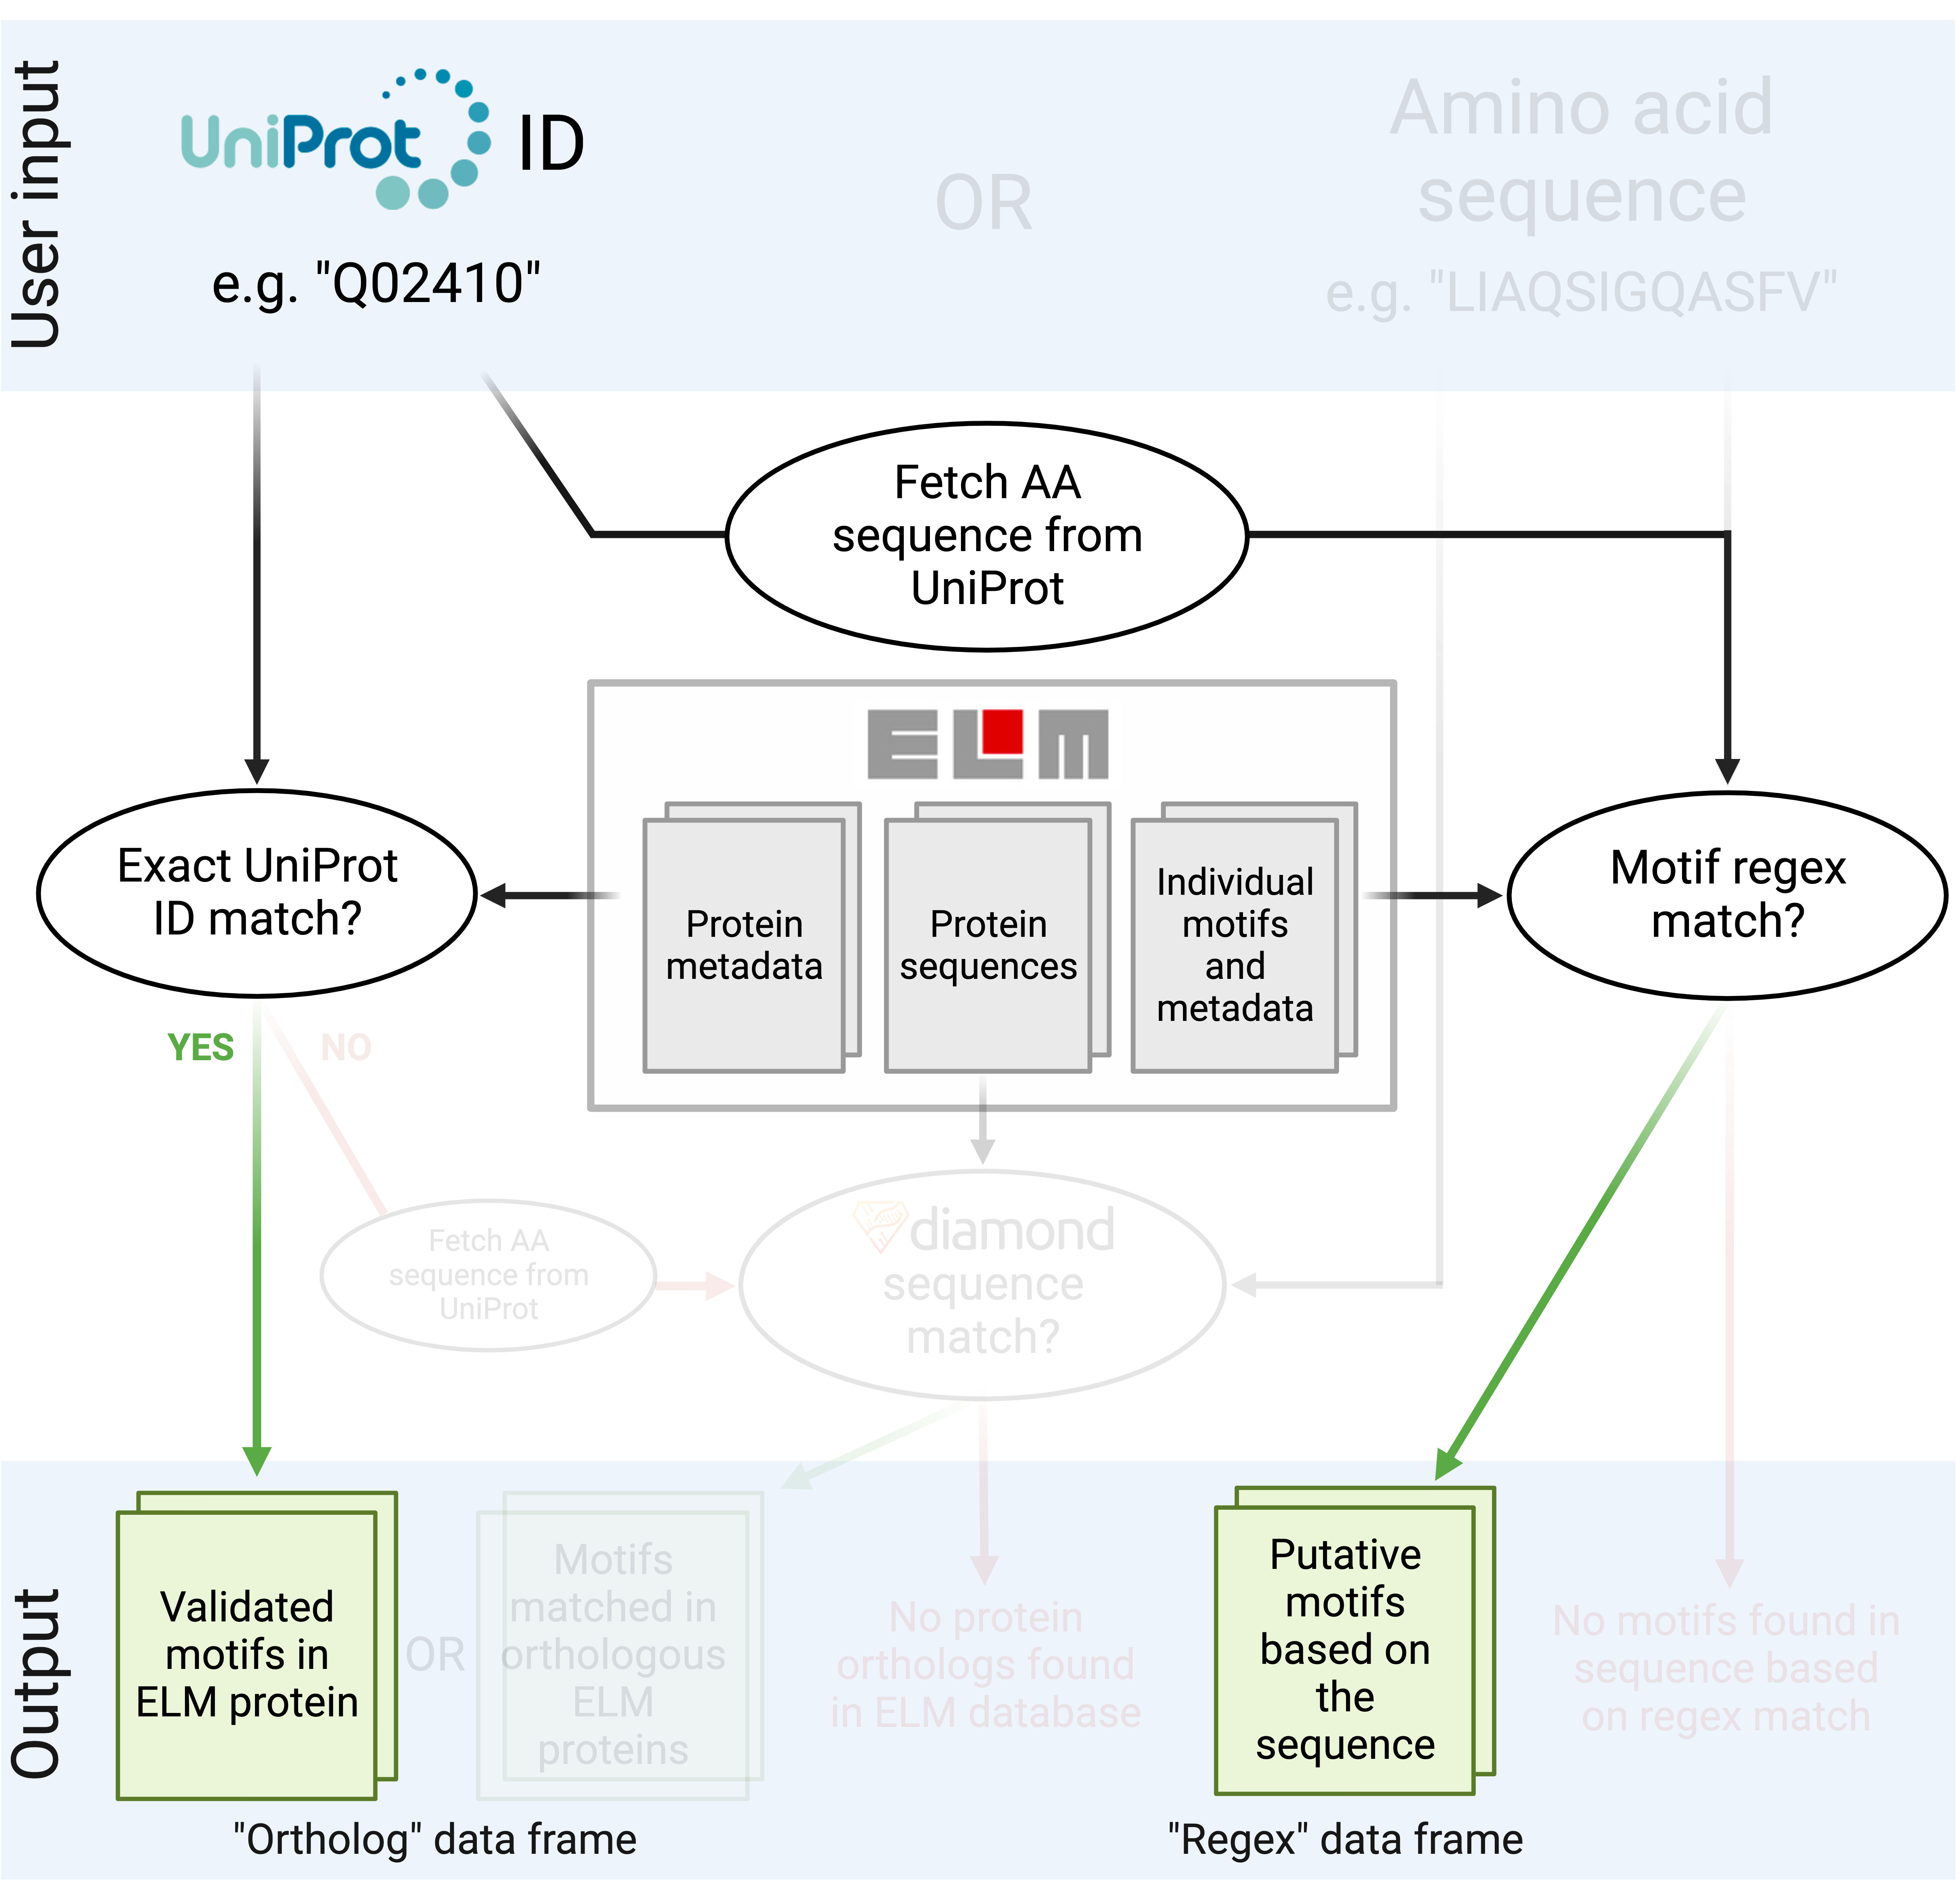

In [6]:
uniprot_id1 = "P11387"
ortholog1, regex1 = gget.elm(uniprot_id1, uniprot=True)

In [7]:
# The fields containing information about the DIAMOND alignment (e.g. identity percentage and whether motif is within subject-query overlap('motif_in_query')) are empty/not applicable since no DIAMOND alignment was performed
ortholog1

Ortholog_UniProt_ID ProteinName class_accession ELMIdentifier  \
0              P11387  TOP1_HUMAN      ELME000251    LIG_KEPE_2   

  FunctionalSiteName                                        Description  \
0   Sumoylation site  Medium length variant of the KEPE motif which ...   

                    Regex  Probability                    Methods  \
0  [VILMFT]K.EP.{2,3}[DE]     0.000035  sequence based prediction   

       Organism  query_seq_length  subject_seq_length  alignment_length  \
0  Homo sapiens               NaN                 NaN               NaN   

   identity_percentage  motif_in_query  query_start  query_end  subject_start  \
0                  NaN             NaN          NaN        NaN            NaN   

   subject_end  motif_start_in_subject  motif_end_in_subject References  \
0          NaN                     116                   123   19033273   

   InstanceLogic  PDB  #Instances  #Instances_in_PDB  
0  true positive  NaN          12                  0

In [8]:
regex1

Instance_accession       ELMIdentifier         FunctionalSiteName ELMType  \
0          ELME000321  CLV_C14_Caspase3-7     Caspase cleavage motif     CLV   
1          ELME000321  CLV_C14_Caspase3-7     Caspase cleavage motif     CLV   
2          ELME000321  CLV_C14_Caspase3-7     Caspase cleavage motif     CLV   
3          ELME000321  CLV_C14_Caspase3-7     Caspase cleavage motif     CLV   
4          ELME000321  CLV_C14_Caspase3-7     Caspase cleavage motif     CLV   
..                ...                 ...                        ...     ...   
19         ELME000462  TRG_Pf-PMV_PEXEL_1  Apicomplexan export motif     TRG   
20         ELME000462  TRG_Pf-PMV_PEXEL_1  Apicomplexan export motif     TRG   
21         ELME000462  TRG_Pf-PMV_PEXEL_1  Apicomplexan export motif     TRG   
22         ELME000462  TRG_Pf-PMV_PEXEL_1  Apicomplexan export motif     TRG   
23         ELME000462  TRG_Pf-PMV_PEXEL_1  Apicomplexan export motif     TRG   

                                          Description  \
0              Caspase-3 and Caspase-7 cleavage site.   
1              Caspase-3 and Caspase-7 cleavage site.   
2              Caspase-3 and Caspase-7 cleavage site.   
3              Caspase-3 and Caspase-7 cleavage site.   
4              Caspase-3 and Caspase-7 cleavage site.   
..                                                ...   
19  Plasmodium Export Element, PEXEL, is a traffic...   
20  Plasmodium Export Element, PEXEL, is a traffic...   
21  Plasmodium Export Element, PEXEL, is a traffic...   
22  Plasmodium Export Element, PEXEL, is a traffic...   
23  Plasmodium Export Element, PEXEL, is a traffic...   

                                  Regex Instances (Matched Sequence)  \
0           [DSTE][^P][^DEWHFYC]D[GSAN]                        EHKDS   
1           [DSTE][^P][^DEWHFYC]D[GSAN]                        EHKDS   
2           [DSTE][^P][^DEWHFYC]D[GSAN]                        EHKDS   
3           [DSTE][^P][^DEWHFYC]D[GSAN]                        EHKDS   
4           [DSTE][^P][^DEWHFYC]D[GSAN]                        EHKDS   
..                                  ...                          ...   
19  (R.[LI].[EDQ])|(R.L..[EDQ])|(K.L.E)                        KLLKE   
20  (R.[LI].[EDQ])|(R.L..[EDQ])|(K.L.E)                        KLLKE   
21  (R.[LI].[EDQ])|(R.L..[EDQ])|(K.L.E)                        KLLKE   
22  (R.[LI].[EDQ])|(R.L..[EDQ])|(K.L.E)                        KLLKE   
23  (R.[LI].[EDQ])|(R.L..[EDQ])|(K.L.E)                        KLLKE   

   motif_start_in_query motif_end_in_query       ProteinName  \
0                    52                 57  A0A0H3NIK3_SALTS   
1                    52                 57        ATN1_HUMAN   
2                    52                 57        ATN1_HUMAN   
3                    52                 57         BCAR1_RAT   
4                    52                 57         BCAR1_RAT   
..                  ...                ...               ...   
19                  332                337      Q8IEQ3_PLAF7   
20                  332                337      Q8IK20_PLAF7   
21                  332                337      Q9TY99_PLAF7   
22                  332                337      Q9U0N3_PLAF7   
23                  332                337      Q9U5L9_PLAF7   

                                             Organism         References  \
0   Salmonella enterica subsp. enterica serovar Ty...           20947770   
1                                        Homo sapiens   10085113 9535906   
2                                        Homo sapiens   10085113 9535906   
3                                   Rattus norvegicus           10712510   
4                                   Rattus norvegicus           10712510   
..                                                ...                ...   
19                          Plasmodium falciparum 3D7           25850860   
20                          Plasmodium falciparum 3D7           19055692   
21                          Plasmodium 

Corresponding result from the ELM website interface (fetch time 00:15.85, compared to 00:02 with `gget`):
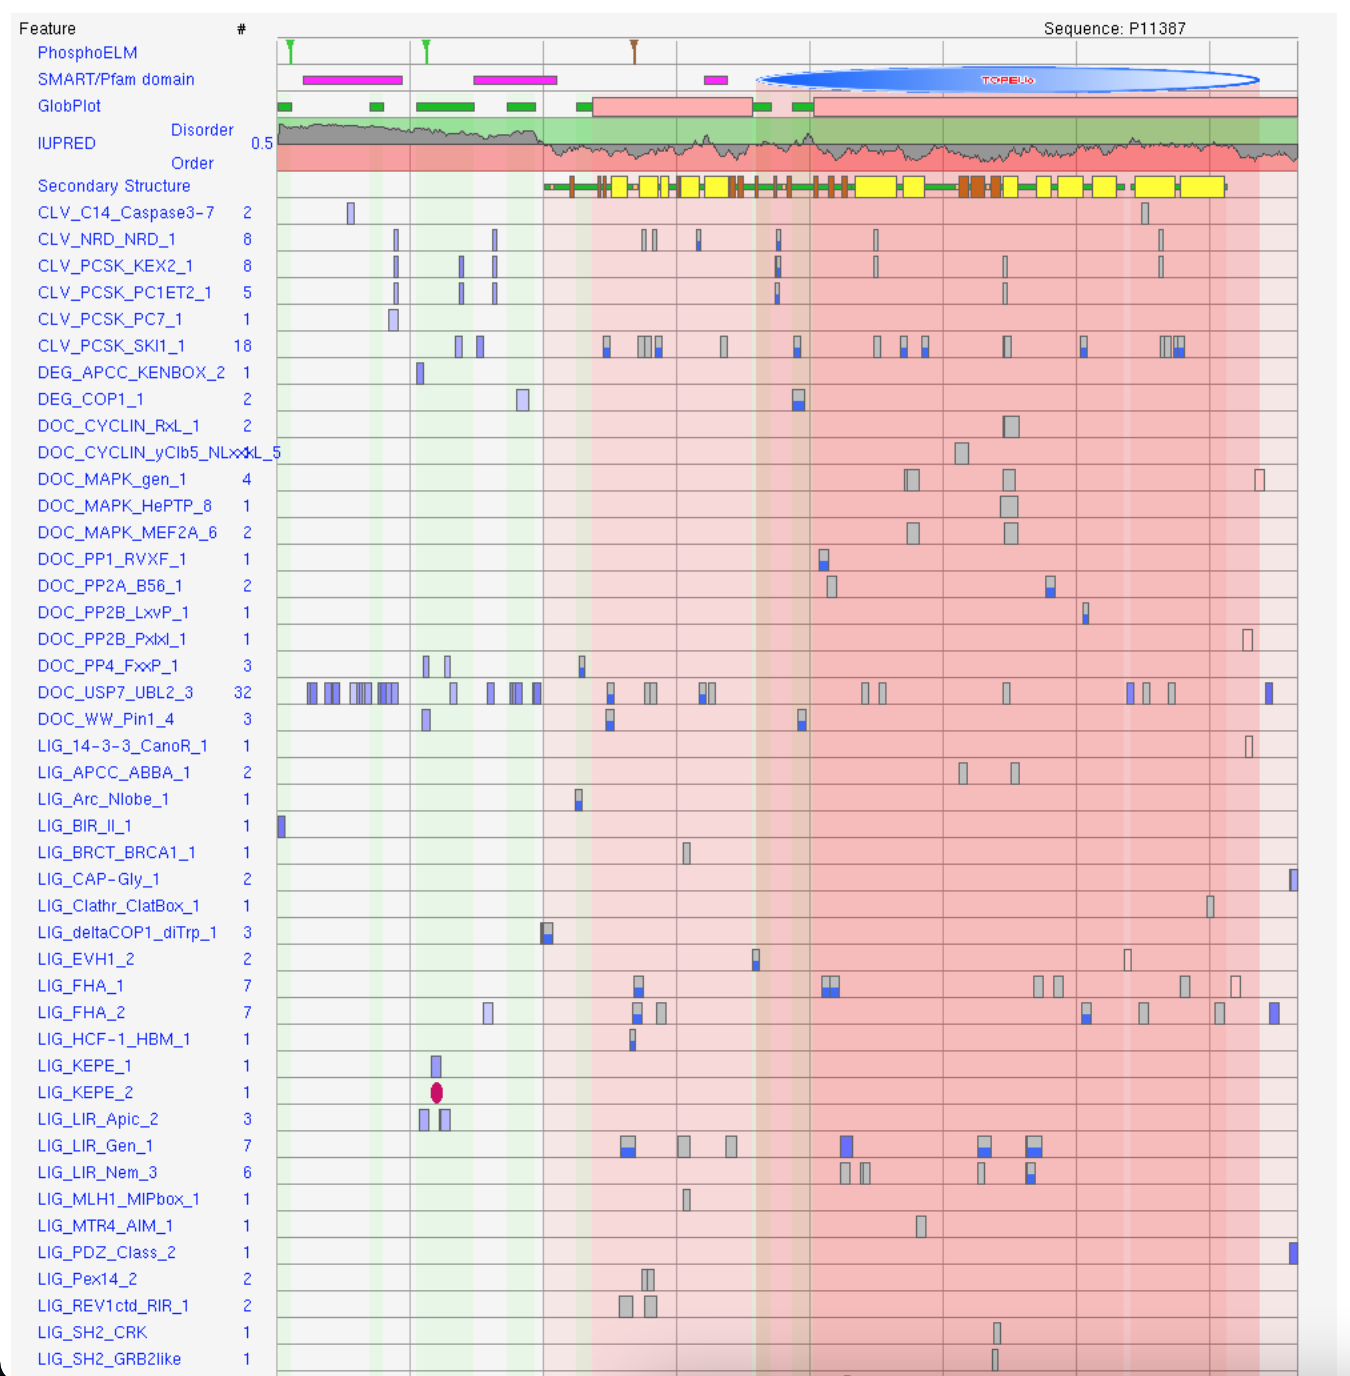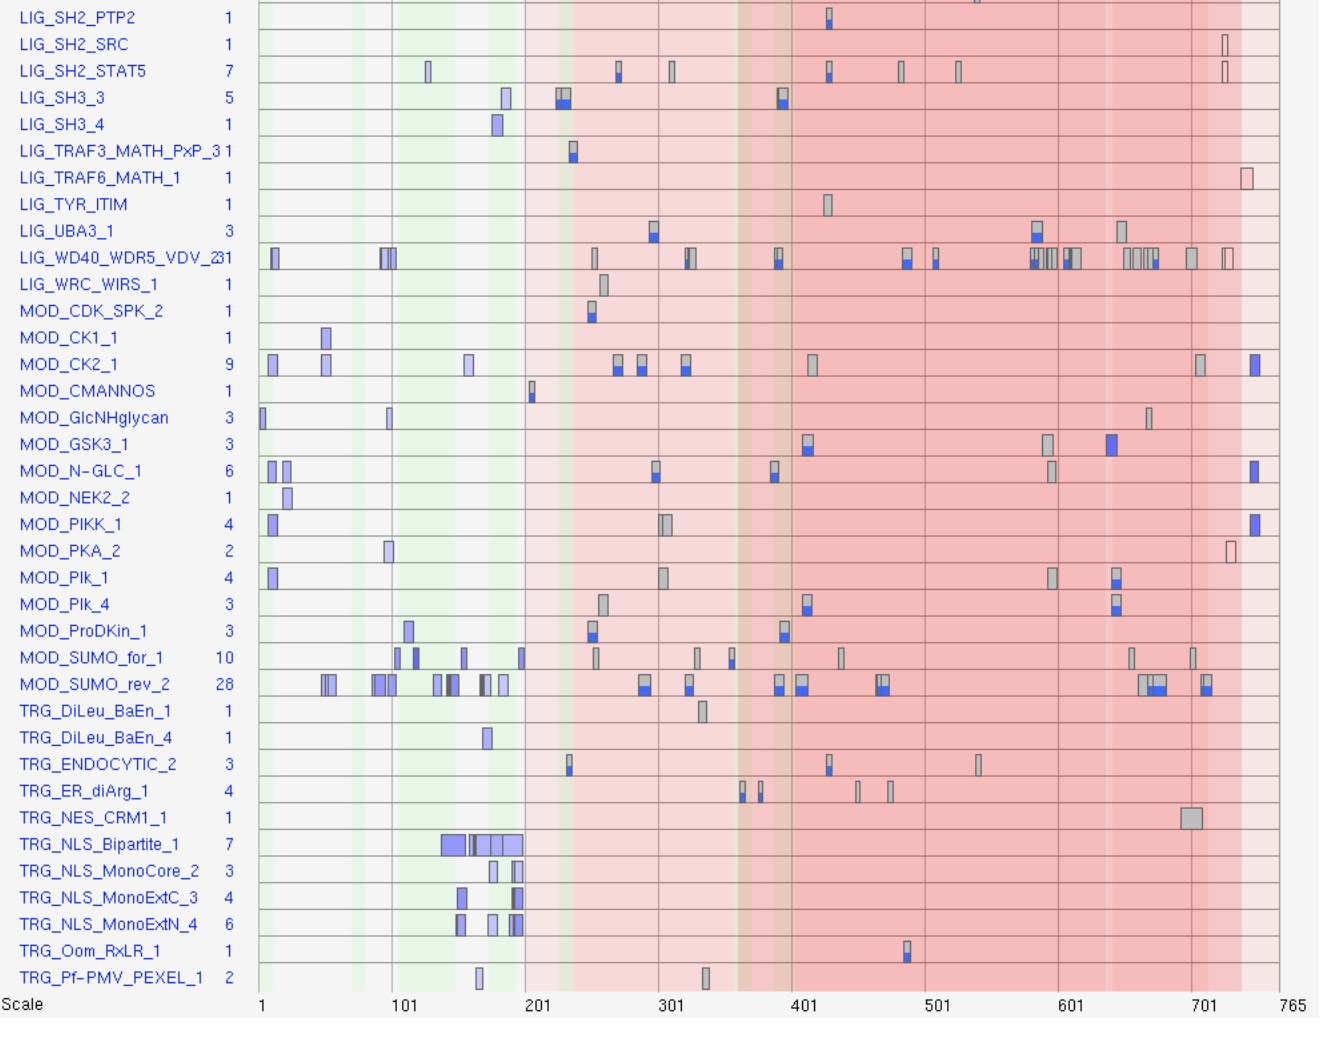

# Path 2: The input is a UniProt ID that does not match a protein contained in the ELM database
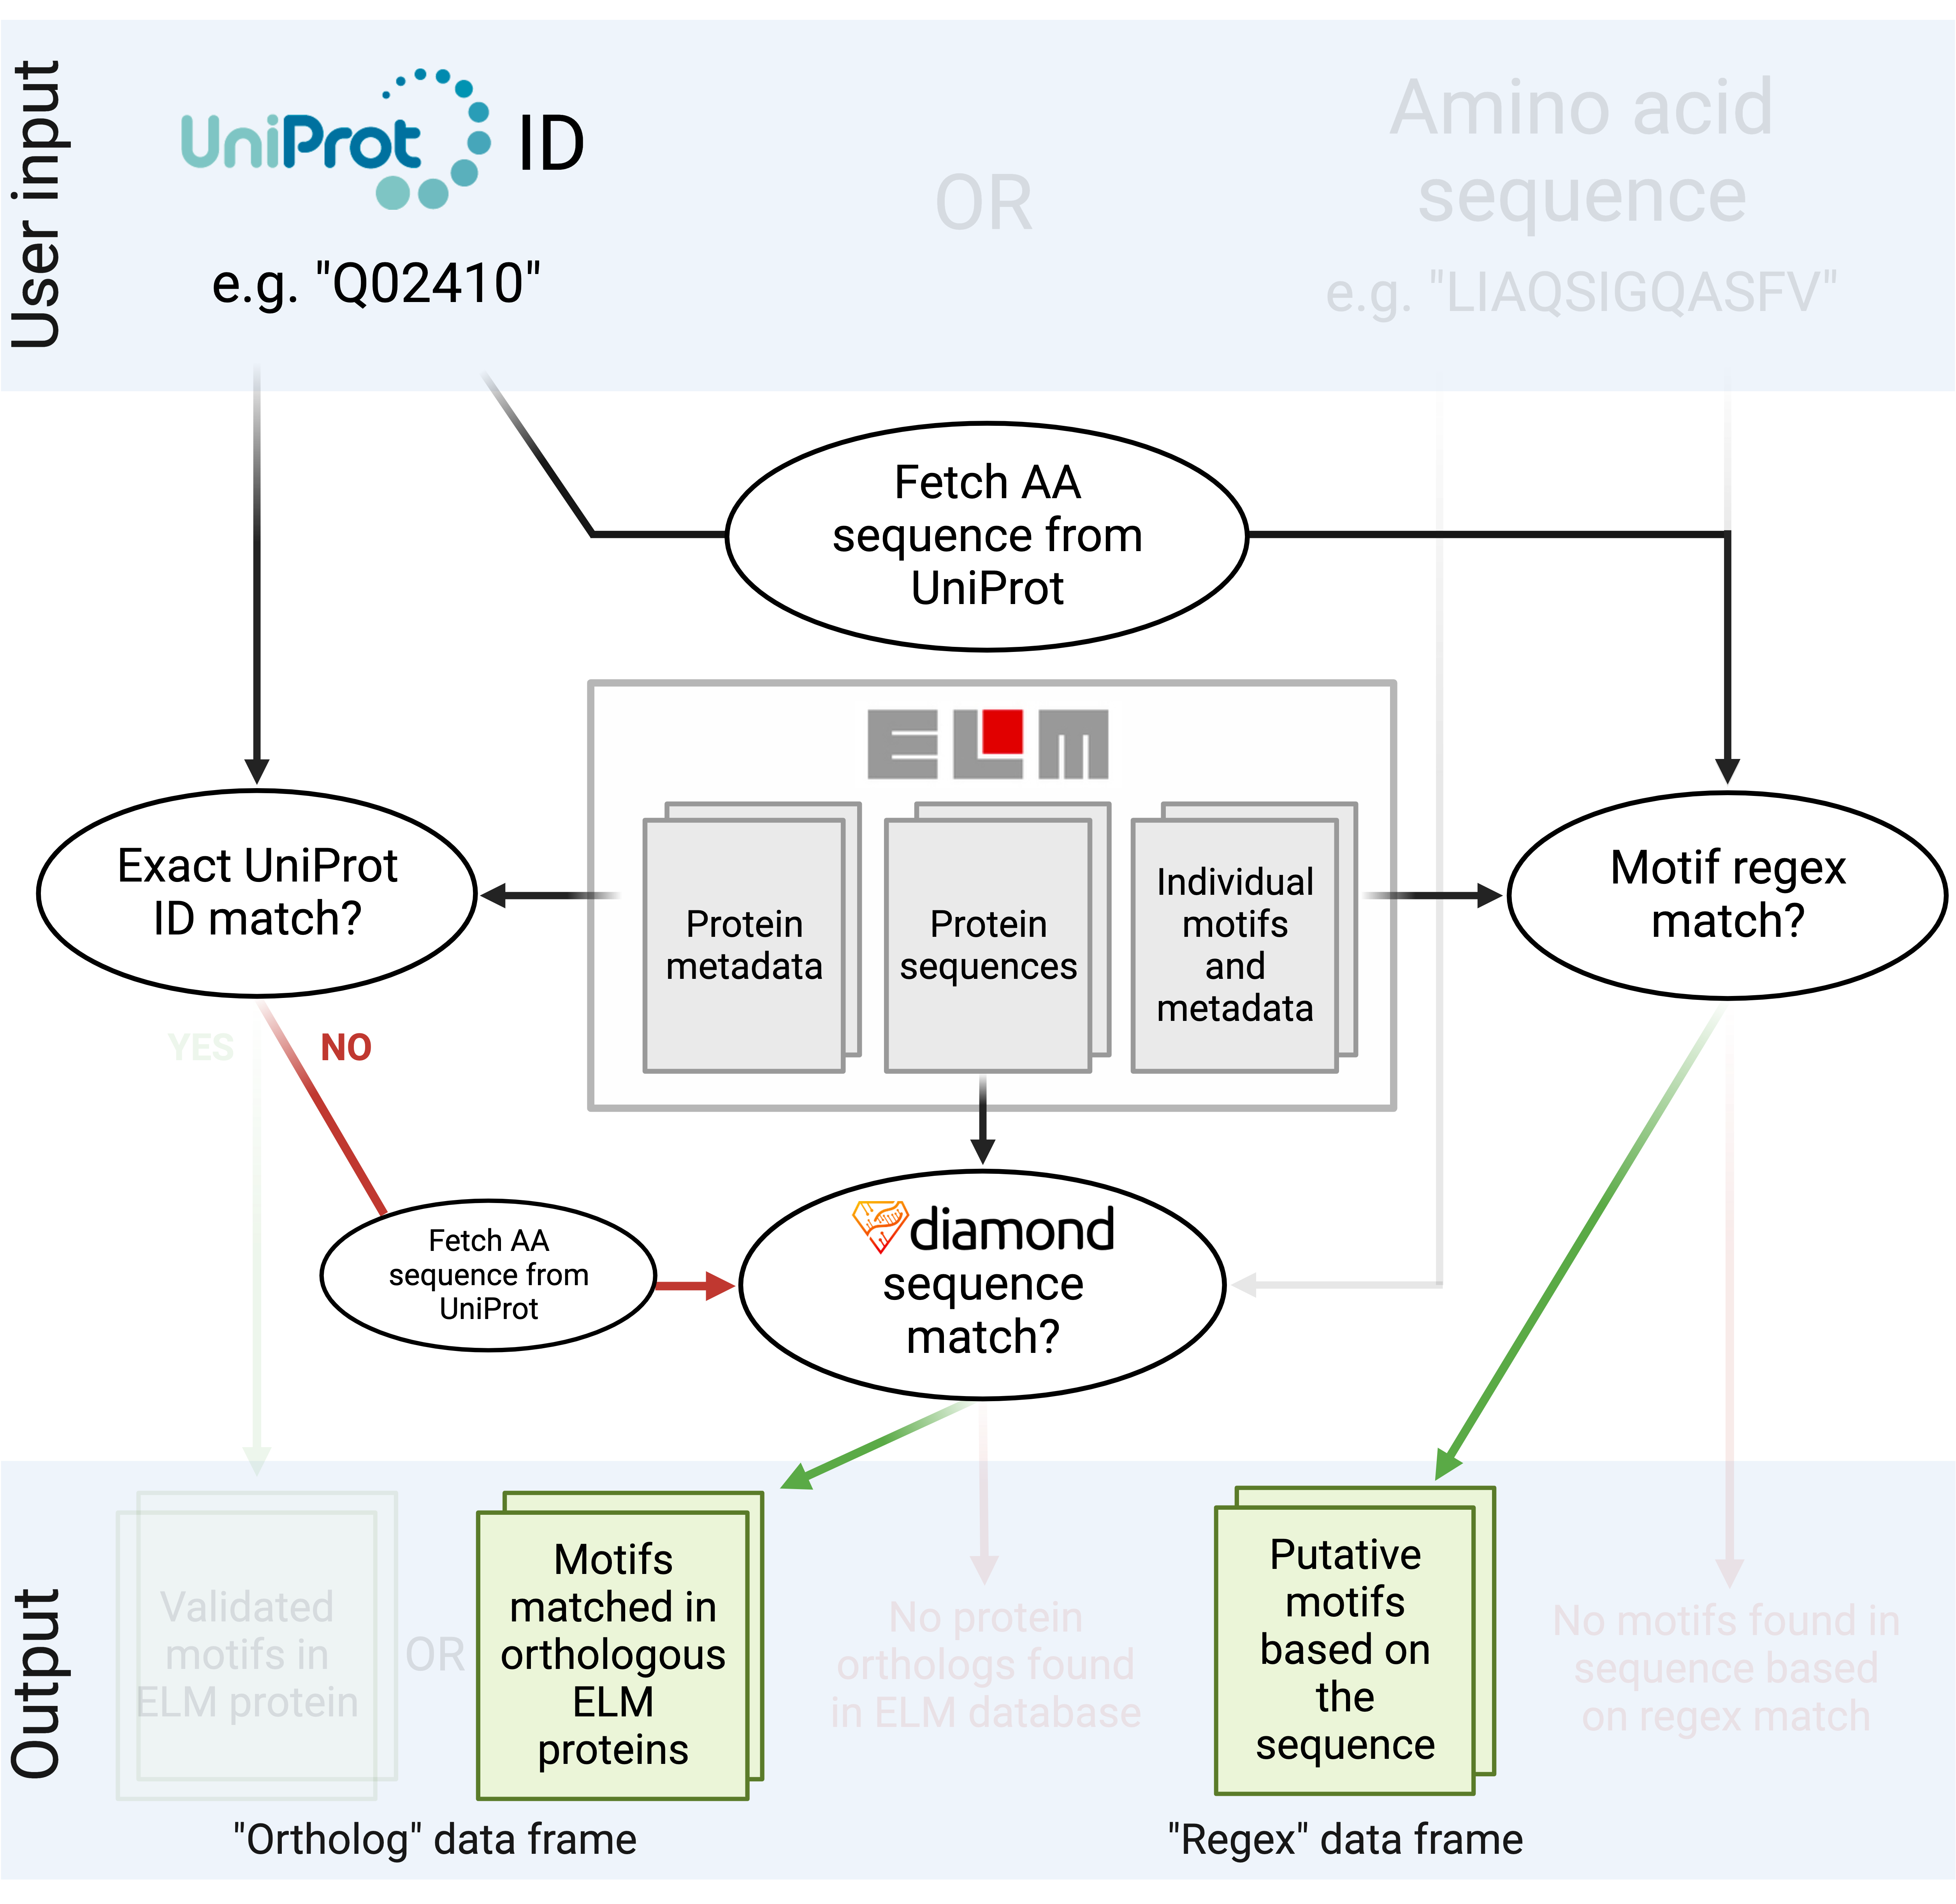

In [9]:
uniprot_id2 = "O35923"
ortholog2, regex2 = gget.elm(uniprot_id2, uniprot=True)

In [10]:
# The returned ortholog data frame contains information about the DIAMOND alignment (e.g. identity and whether motif is within subject-query overlap)
ortholog2

Ortholog_UniProt_ID  ProteinName class_accession     ELMIdentifier  \
0              P51587  BRCA2_HUMAN      ELME000425    DOC_PP2A_B56_1   
1              P51587  BRCA2_HUMAN      ELME000413  LIG_PALB2_WD40_1   
2              P51587  BRCA2_HUMAN      ELME000442         MOD_Plk_1   

                         FunctionalSiteName  \
0          PP2A holoenzyme B56-docking site   
1  PALB2 WD40 repeat binding motif in BRCA2   
2             Polo-like kinase phosphosites   

                                         Description  \
0  Docking site required for the regulatory subun...   
1  A motif present in the BRCA2 protein which bin...   
2  Ser/Thr residue phosphorylated by the Plk1 kinase   

                                               Regex  Probability  \
0                   ([LMFYWIC]..I.E)|(L..[IVLWC].E).     0.001458   
1                                          ....WF..L     0.000009   
2  .[DNE][^PG][ST](([FYILMVW]..)|([^PEDGKN][FWYLI...     0.007674   

                                             Methods      Organism  \
0            alanine scanning; coimmunoprecipitation  Homo sapiens   
1  coimmunoprecipitation; fluorescence polarizati...  Homo sapiens   
2  alanine scanning; detection by mass spectromet...  Homo sapiens   

   query_seq_length  subject_seq_length  alignment_length  \
0              3343                3418              3417   
1              3343                3418              3417   
2              3343                3418              3417   

   identity_percentage  motif_in_query  query_start  query_end  subject_start  \
0                 56.6            True            1       3303              1   
1                 56.6            True            1       3303              1   
2                 56.6            True            1       3303              1   

   subject_end  motif_start_in_subject  motif_end_in_subject References  \
0         3371                    1114                  1119   27453045   
1         3371                      27                    35   19609323   
2         3371                     190                   196   12815053   

   InstanceLogic   PDB  #Instances  #Instances_in_PDB  
0  true positive   NaN          18                  2  
1  true positive  3EU7           1                  1  
2  true positive   NaN          44                  0

In [11]:
regex2

Instance_accession       ELMIdentifier         FunctionalSiteName ELMType  \
0          ELME000321  CLV_C14_Caspase3-7     Caspase cleavage motif     CLV   
1          ELME000321  CLV_C14_Caspase3-7     Caspase cleavage motif     CLV   
2          ELME000321  CLV_C14_Caspase3-7     Caspase cleavage motif     CLV   
3          ELME000321  CLV_C14_Caspase3-7     Caspase cleavage motif     CLV   
4          ELME000321  CLV_C14_Caspase3-7     Caspase cleavage motif     CLV   
..                ...                 ...                        ...     ...   
19         ELME000462  TRG_Pf-PMV_PEXEL_1  Apicomplexan export motif     TRG   
20         ELME000462  TRG_Pf-PMV_PEXEL_1  Apicomplexan export motif     TRG   
21         ELME000462  TRG_Pf-PMV_PEXEL_1  Apicomplexan export motif     TRG   
22         ELME000462  TRG_Pf-PMV_PEXEL_1  Apicomplexan export motif     TRG   
23         ELME000462  TRG_Pf-PMV_PEXEL_1  Apicomplexan export motif     TRG   

                                          Description  \
0              Caspase-3 and Caspase-7 cleavage site.   
1              Caspase-3 and Caspase-7 cleavage site.   
2              Caspase-3 and Caspase-7 cleavage site.   
3              Caspase-3 and Caspase-7 cleavage site.   
4              Caspase-3 and Caspase-7 cleavage site.   
..                                                ...   
19  Plasmodium Export Element, PEXEL, is a traffic...   
20  Plasmodium Export Element, PEXEL, is a traffic...   
21  Plasmodium Export Element, PEXEL, is a traffic...   
22  Plasmodium Export Element, PEXEL, is a traffic...   
23  Plasmodium Export Element, PEXEL, is a traffic...   

                                  Regex Instances (Matched Sequence)  \
0           [DSTE][^P][^DEWHFYC]D[GSAN]                        SVSDS   
1           [DSTE][^P][^DEWHFYC]D[GSAN]                        SVSDS   
2           [DSTE][^P][^DEWHFYC]D[GSAN]                        SVSDS   
3           [DSTE][^P][^DEWHFYC]D[GSAN]                        SVSDS   
4           [DSTE][^P][^DEWHFYC]D[GSAN]                        SVSDS   
..                                  ...                          ...   
19  (R.[LI].[EDQ])|(R.L..[EDQ])|(K.L.E)                       RALTRQ   
20  (R.[LI].[EDQ])|(R.L..[EDQ])|(K.L.E)                       RALTRQ   
21  (R.[LI].[EDQ])|(R.L..[EDQ])|(K.L.E)                       RALTRQ   
22  (R.[LI].[EDQ])|(R.L..[EDQ])|(K.L.E)                       RALTRQ   
23  (R.[LI].[EDQ])|(R.L..[EDQ])|(K.L.E)                       RALTRQ   

   motif_start_in_query motif_end_in_query       ProteinName  \
0                   238                243  A0A0H3NIK3_SALTS   
1                   238                243        ATN1_HUMAN   
2                   238                243        ATN1_HUMAN   
3                   238                243         BCAR1_RAT   
4                   238                243         BCAR1_RAT   
..                  ...                ...               ...   
19                 2817               2823      Q8IEQ3_PLAF7   
20                 2817               2823      Q8IK20_PLAF7   
21                 2817               2823      Q9TY99_PLAF7   
22                 2817               2823      Q9U0N3_PLAF7   
23                 2817               2823      Q9U5L9_PLAF7   

                                             Organism         References  \
0   Salmonella enterica subsp. enterica serovar Ty...           20947770   
1                                        Homo sapiens   10085113 9535906   
2                                        Homo sapiens   10085113 9535906   
3                                   Rattus norvegicus           10712510   
4                                   Rattus norvegicus           10712510   
..                                                ...                ...   
19                          Plasmodium falciparum 3D7           25850860   
20                          Plasmodium falciparum 3D7           19055692   
21                          Plasmodium 

Corresponding result from the ELM website interface (fetch time 00:23.04, compared to 00:07 with `gget`):
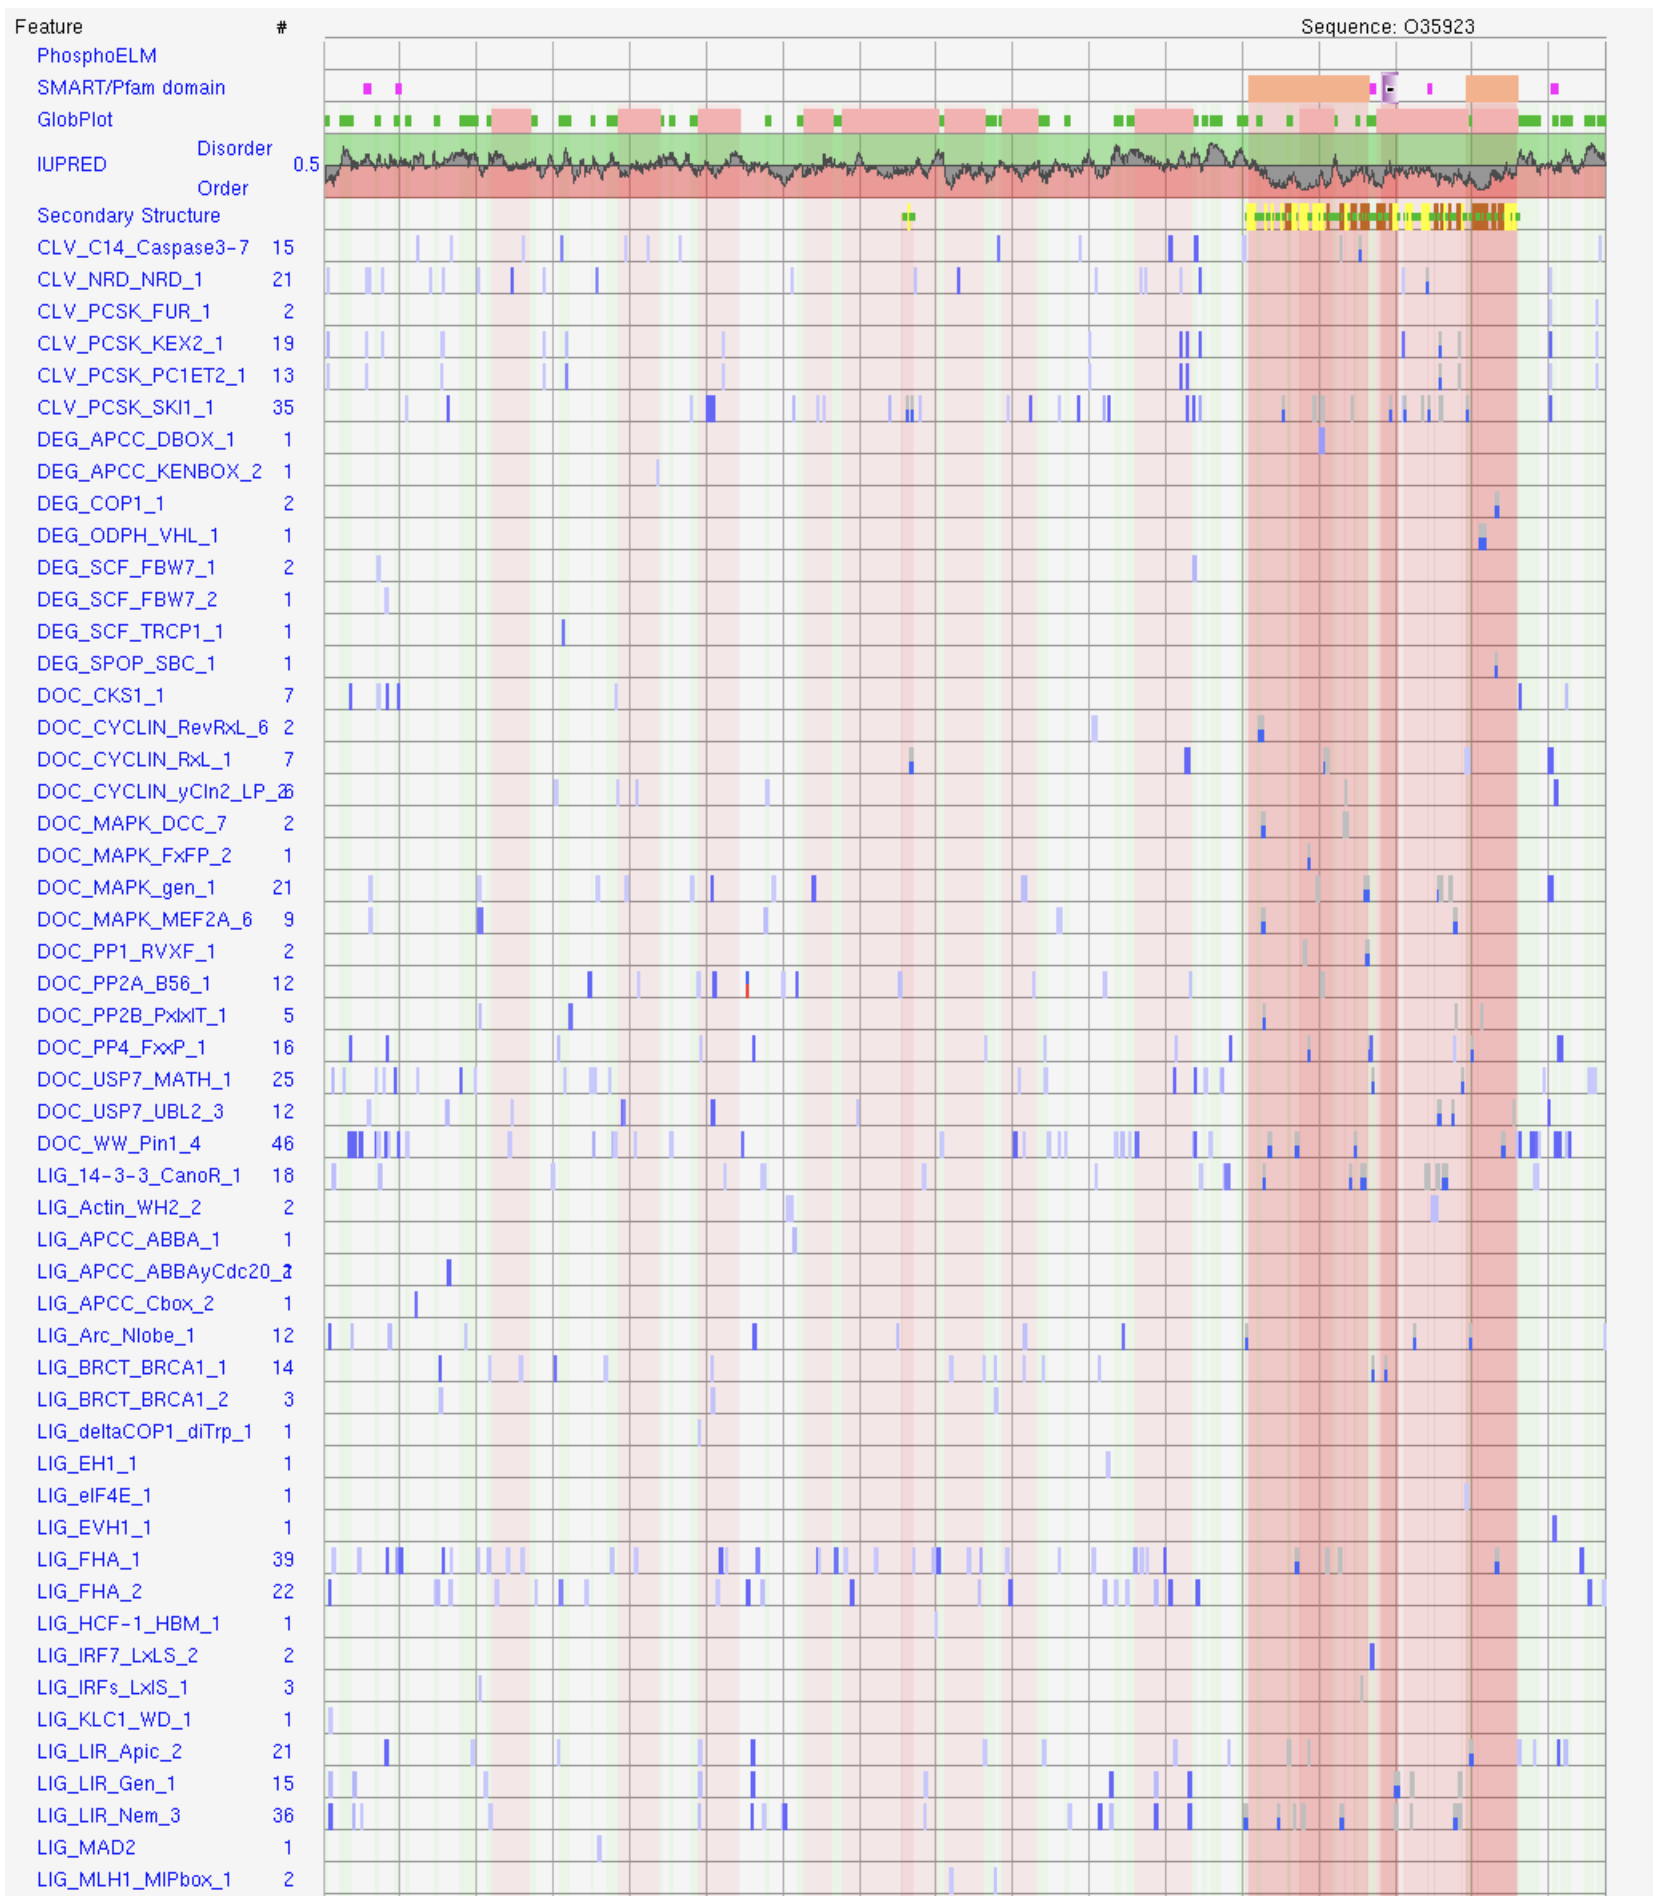

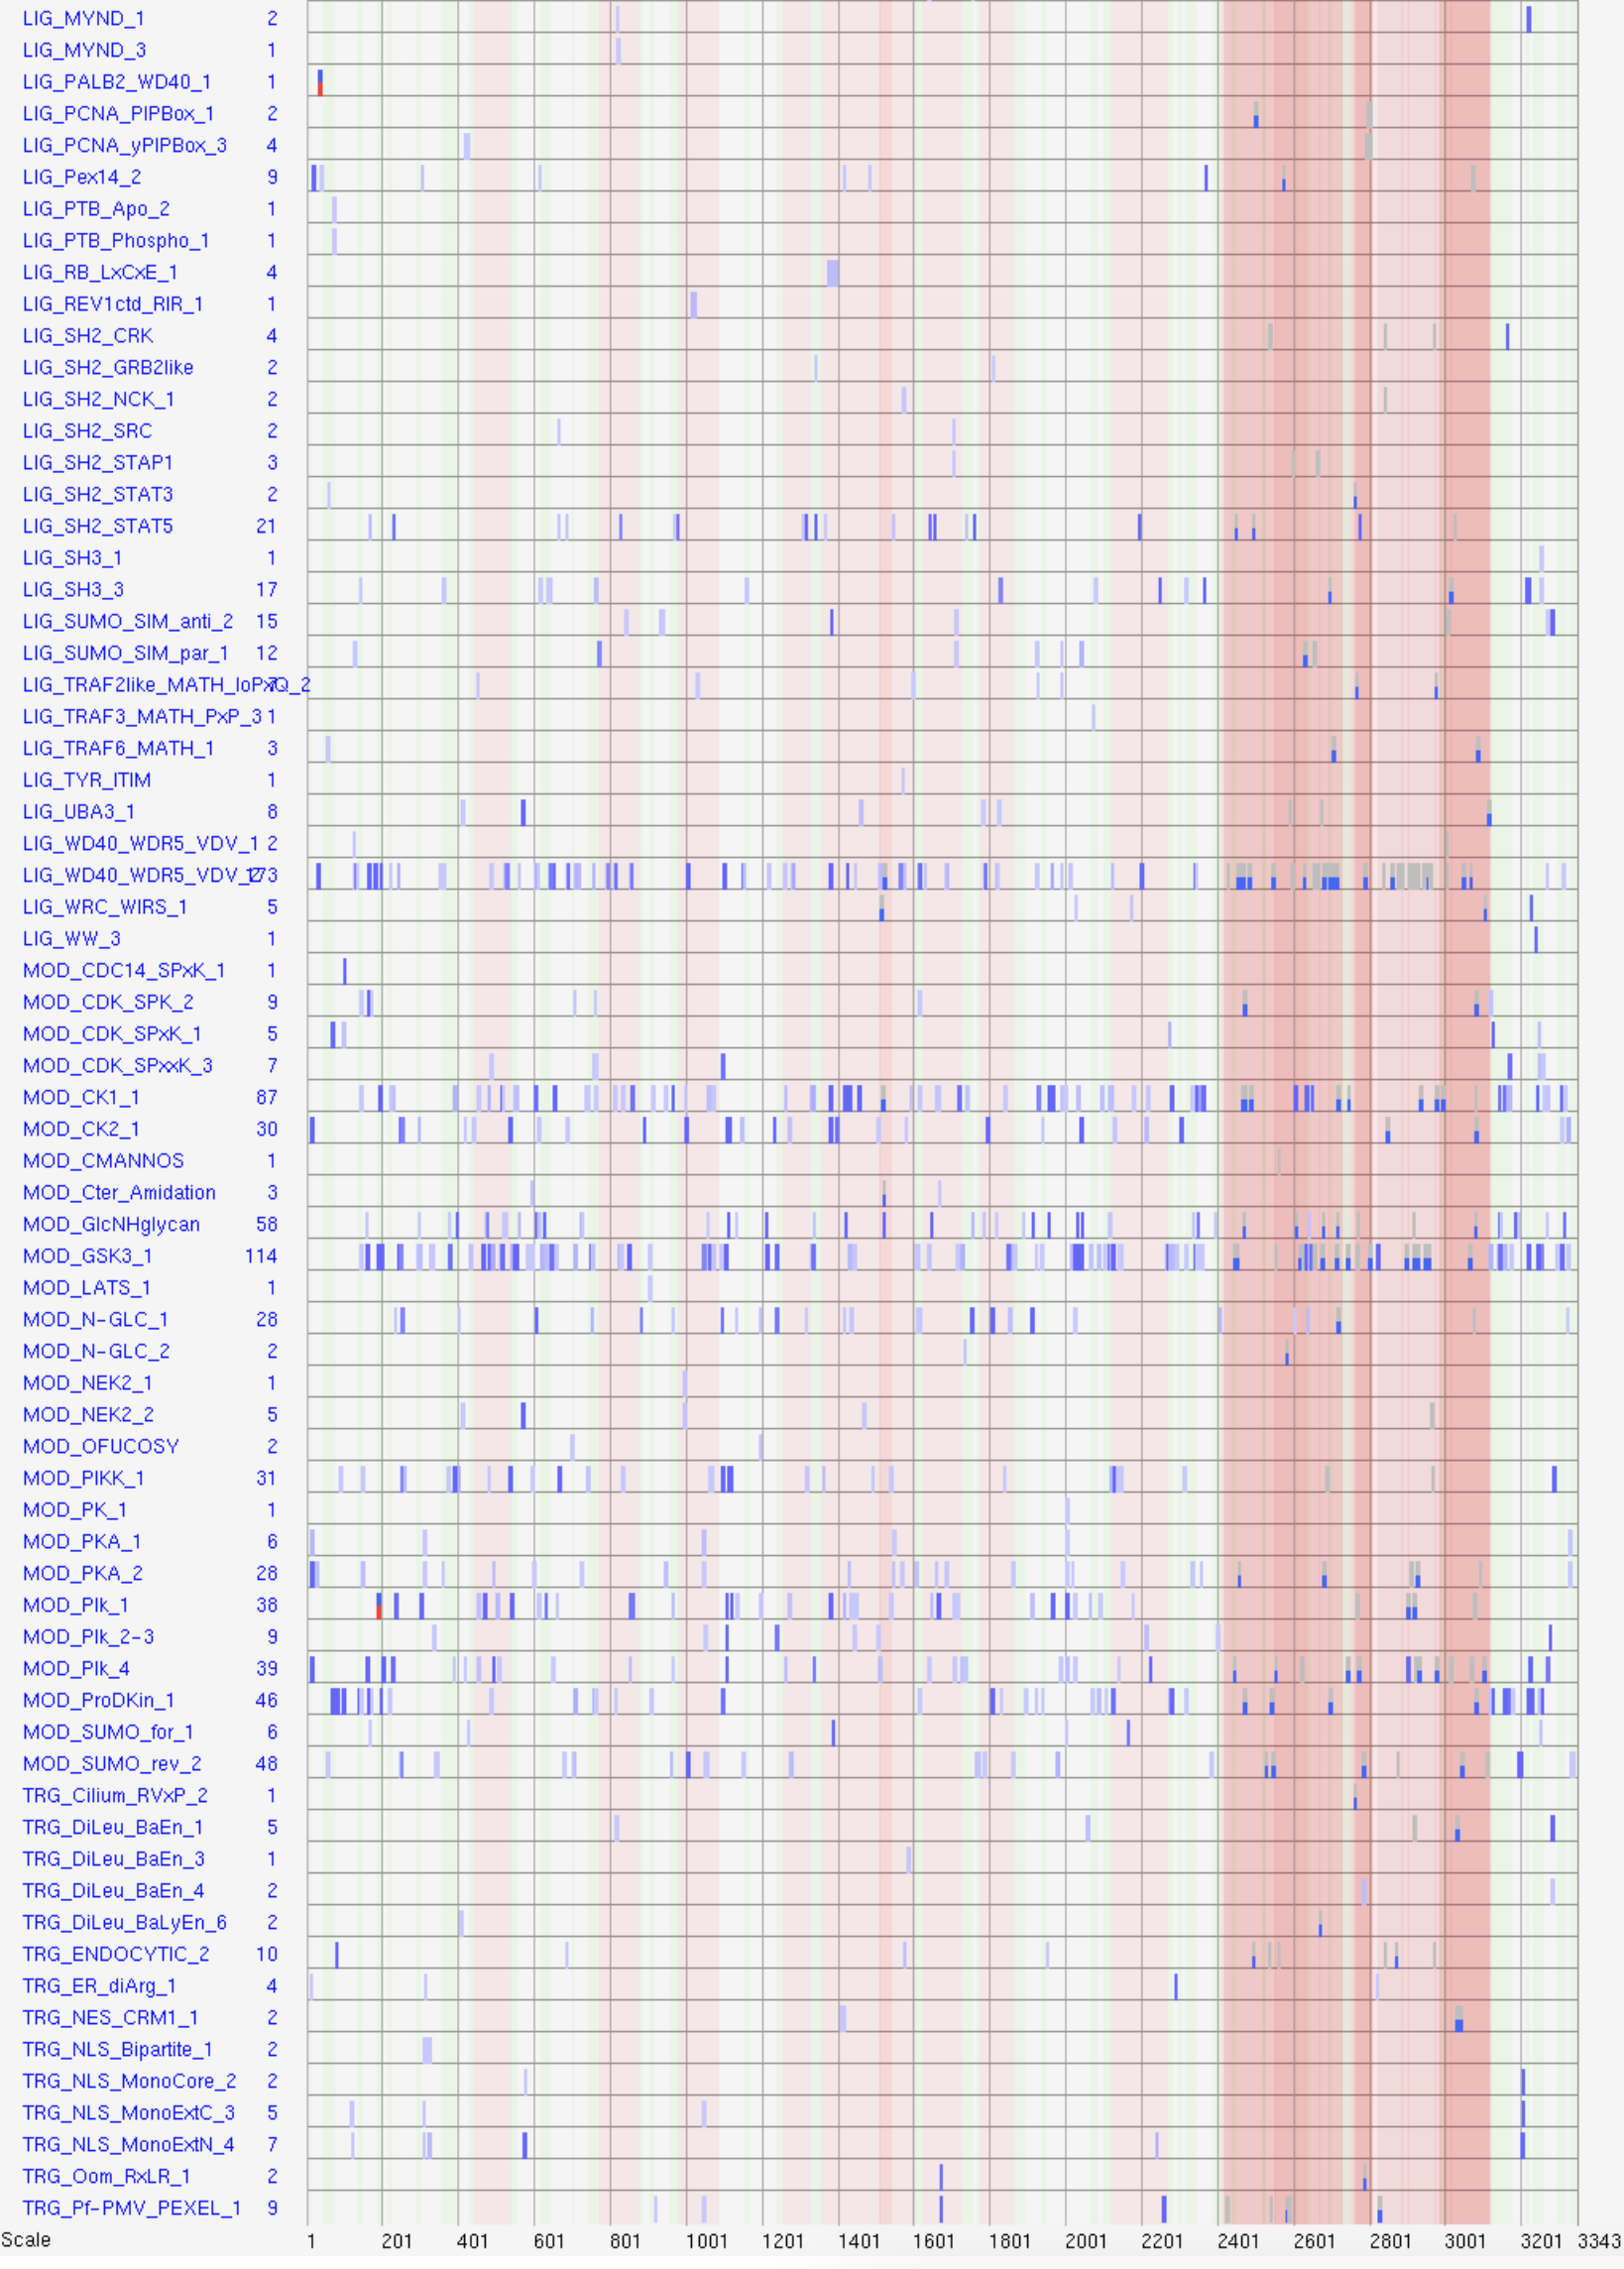

# Path 3: The input is an amino acid sequence
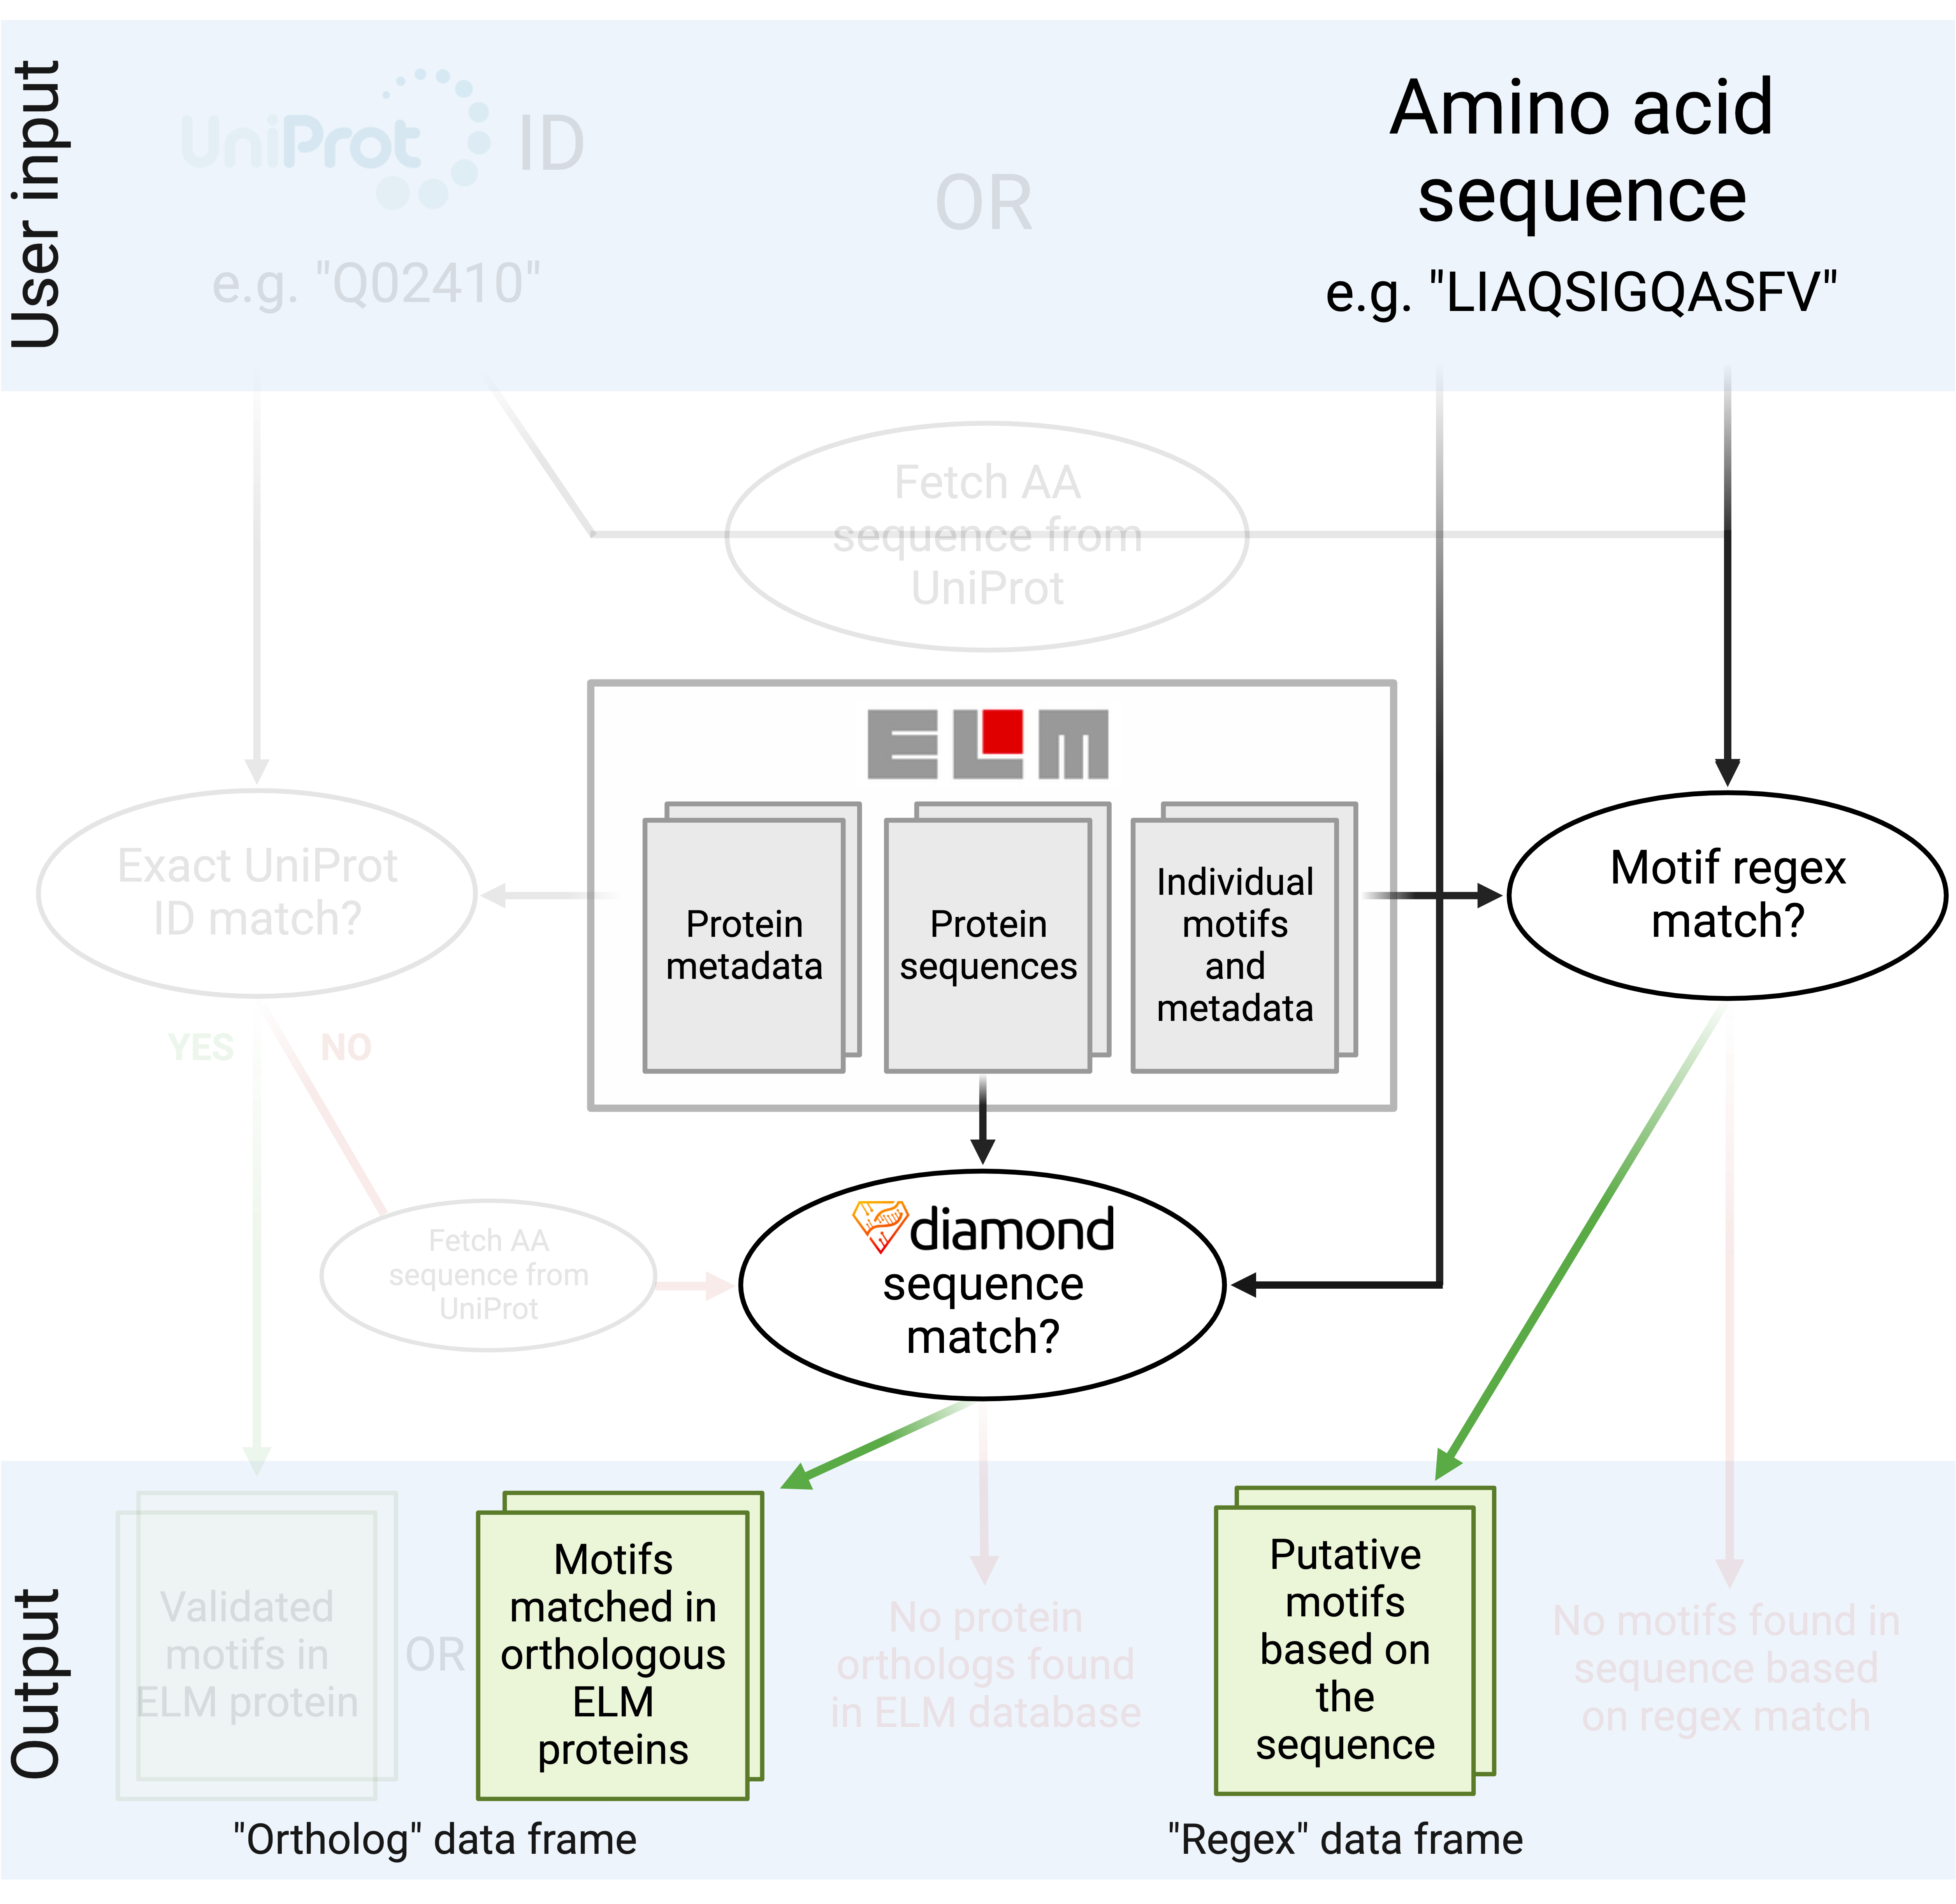

In [12]:
seq = "GGETISAWESQMEELVISISALIVELQVEFRANKLINPACHTERLABRQCKSFKIEPPGLFRGRG"
ortholog3, regex3 = gget.elm(seq, uniprot=False)

In [13]:
# The returned ortholog data frame contains information about the DIAMOND alignment (e.g. identity and whether motif is within subject-query overlap)
ortholog3

Ortholog_UniProt_ID ProteinName class_accession ELMIdentifier  \
0              P11387  TOP1_HUMAN      ELME000251    LIG_KEPE_2   

  FunctionalSiteName                                        Description  \
0   Sumoylation site  Medium length variant of the KEPE motif which ...   

                    Regex  Probability                    Methods  \
0  [VILMFT]K.EP.{2,3}[DE]     0.000035  sequence based prediction   

       Organism  query_seq_length  subject_seq_length  alignment_length  \
0  Homo sapiens                65                 765                25   

   identity_percentage  motif_in_query  query_start  query_end  subject_start  \
0                 68.0           False           41         65            346   

   subject_end  motif_start_in_subject  motif_end_in_subject References  \
0          365                     116                   123   19033273   

   InstanceLogic  PDB  #Instances  #Instances_in_PDB  
0  true positive  NaN          12                  0

In [14]:
regex3

Instance_accession          ELMIdentifier  \
0          ELME000146        CLV_PCSK_SKI1_1   
1          ELME000146        CLV_PCSK_SKI1_1   
0          ELME000491  DOC_CYCLIN_yCln2_LP_2   
1          ELME000491  DOC_CYCLIN_yCln2_LP_2   
2          ELME000491  DOC_CYCLIN_yCln2_LP_2   
..                ...                    ...   
13         ELME000193         TRG_NES_CRM1_1   
14         ELME000193         TRG_NES_CRM1_1   
15         ELME000193         TRG_NES_CRM1_1   
16         ELME000193         TRG_NES_CRM1_1   
17         ELME000193         TRG_NES_CRM1_1   

                         FunctionalSiteName ELMType  \
0                        PCSK cleavage site     CLV   
1                        PCSK cleavage site     CLV   
0   Cyclin N-terminal Domain Docking Motifs     DOC   
1   Cyclin N-terminal Domain Docking Motifs     DOC   
2   Cyclin N-terminal Domain Docking Motifs     DOC   
..                                      ...     ...   
13               NES Nuclear Export Signals     TRG   
14               NES Nuclear Export Signals     TRG   
15               NES Nuclear Export Signals     TRG   
16               NES Nuclear Export Signals     TRG   
17               NES Nuclear Export Signals     TRG   

                                          Description  \
0   Subtilisin/kexin isozyme-1 (SKI1) cleavage sit...   
1   Subtilisin/kexin isozyme-1 (SKI1) cleavage sit...   
0   The budding yeast G1/S cyclins Cln1 and 2 bind...   
1   The budding yeast G1/S cyclins Cln1 and 2 bind...   
2   The budding yeast G1/S cyclins Cln1 and 2 bind...   
..                                                ...   
13  Many proteins re-exported from the nucleus con...   
14  Many proteins re-exported from the nucleus con...   
15  Many proteins re-exported from the nucleus con...   
16  Many proteins re-exported from the nucleus con...   
17  Many proteins re-exported from the nucleus con...   

                                                Regex  \
0                                [RK].[AILMFV][LTKF].   
1                                [RK].[AILMFV][LTKF].   
0   (L[MLIV]PP)|(((L[LMIV]PA)|(L..P))[ILMVAFYW].[M...   
1   (L[MLIV]PP)|(((L[LMIV]PA)|(L..P))[ILMVAFYW].[M...   
2   (L[MLIV]PP)|(((L[LMIV]PA)|(L..P))[ILMVAFYW].[M...   
..                                                ...   
13  ([DEQ].{0,1}[LIM].{2,3}[LIVMF][^P]{2,3}[LMVF]....   
14  ([DEQ].{0,1}[LIM].{2,3}[LIVMF][^P]{2,3}[LMVF]....   
15  ([DEQ].{0,1}[LIM].{2,3}[LIVMF][^P]{2,3}[LMVF]....   
16  ([DEQ].{0,1}[LIM].{2,3}[LIVMF][^P]{2,3}[LMVF]....   
17  ([DEQ].{0,1}[LIM].{2,3}[LIVMF][^P]{2,3}[LMVF]....   

   Instances (Matched Sequence) motif_start_in_query motif_end_in_query  \
0                         KSFKI                   50                 55   
1                         KSFKI                   50                 55   
0                       LINPACH                   34                 41   
1                       LINPACH                   34                 41   
2                       LINPACH                   34                 41   
..                          ...                  ...                ...   
13                EELVISISALIVE                   12                 25   
14                EELVISISALIVE                   12                 25   
15                EELVISISALIVE                   12                 25   
16                EELVISISALIVE                   12                 25   
17                EELVISISALIVE                   12                 25   

    ProteinName                                           Organism  \
0   ATF6A_HUMAN                                       Homo sapiens   
1   SRBP2_HUMAN                                       Homo sapiens   
0    ACE2_YEAST                     Saccharomyces cerevisiae S288c   
1    BNI1_YEAST                     Saccharomyces cerevisiae S288c   
2    BOI2_YEAST                     Saccharomyces cerevisiae S288c   
..          ...                                                ...   
13  

Corresponding result from the ELM website interface (fetch time 04:13.00 (compared to 1s with `gget elm`)):  
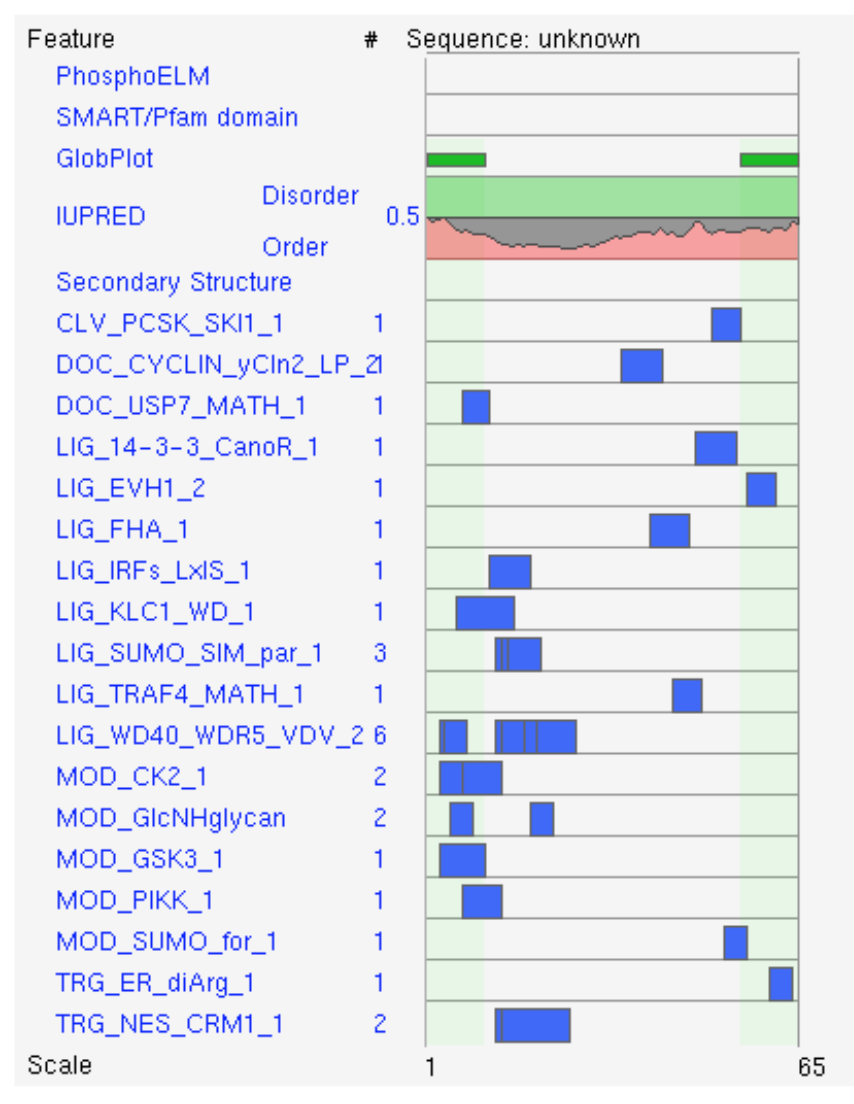